<a href="https://colab.research.google.com/github/imranttsia/Deep-learning/blob/main/Simple_RNN_on_IMBD_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [25]:
# returns only the output at the last timestep
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [26]:
# he following example returns the full state sequence:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))

model.add(SimpleRNN(32, return_sequences=True))

model.add(SimpleRNN(32))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_24 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.utils import pad_sequences

print(pad_sequences)

<function pad_sequences at 0x7fe0cb086a60>


In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [33]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 26s 154ms/step - loss: 0.6868 - acc: 0.5433 - val_loss: 0.6763 - val_acc: 0.5682
Epoch 2/10
157/157 [==============================] - 25s 160ms/step - loss: 0.5654 - acc: 0.7226 - val_loss: 0.4622 - val_acc: 0.8008
Epoch 3/10
157/157 [==============================] - 23s 149ms/step - loss: 0.3585 - acc: 0.8512 - val_loss: 0.4247 - val_acc: 0.8182
Epoch 4/10
157/157 [==============================] - 24s 155ms/step - loss: 0.2587 - acc: 0.8985 - val_loss: 0.4015 - val_acc: 0.8394
Epoch 5/10
157/157 [==============================] - 25s 156ms/step - loss: 0.1801 - acc: 0.9339 - val_loss: 0.4303 - val_acc: 0.8356
Epoch 6/10
157/157 [==============================] - 24s 151ms/step - loss: 0.1189 - acc: 0.9590 - val_loss: 0.5082 - val_acc: 0.8054
Epoch 7/10
157/157 [==============================] - 24s 155ms/step - loss: 0.0694 - acc: 0.9786 - val_loss: 0.6128 - val_acc: 0.7808
Epoch 8/10
157/157 [==============================] - 2

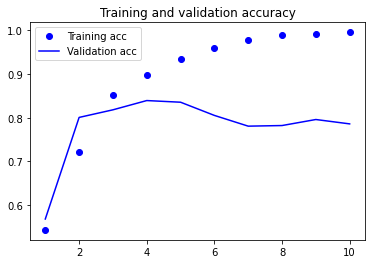

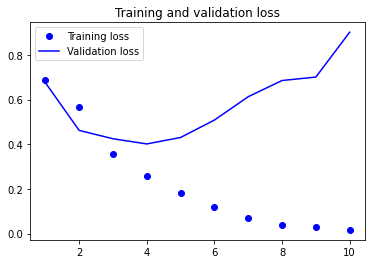

In [34]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()